# 공간으로 시간 벌기
### 시간과 공간의 효율성은 항상 상충됨

## 모든 답을 미리 다 계산해 저장해 놓는다면 (Fib[0]-Fib[99])미리 계산 해두면(공간99개 즉 ,n개 필요) ==> 모든 알고리즘은 O(1)이 가능

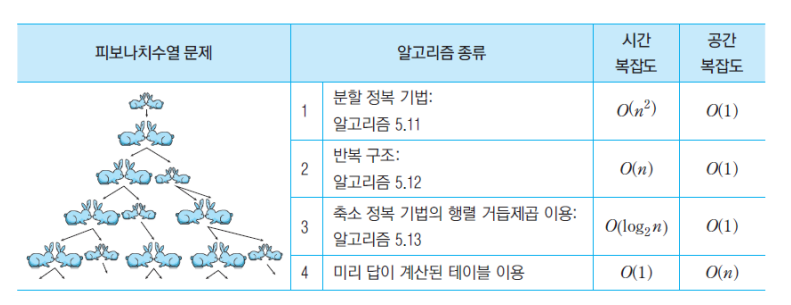


# 문제는? 공간!

## 현실적인 수준에서 공간을 희생해 시간 효율성을 높이는 방법들

## 정렬 문자열 매칭 해싱 등

### 다음장 동적계획법 ==> 공간을 좀더 사용해 시간을 줄이는 설계기법

# 6.1 기수 정렬

## 지금까지 방법들(3장 선택,4장 삽입,5장 변합,퀵정렬)은 비교기반 정렬(킷값들 비교하여A[i]<A[j] O(nlog 2^n) 적절한 배분을 사용)

### 배분을 이용한 아이디어

## 입력의 종류에 대한 제한, 추가적인 메모리 필요(공간을 희생하여 시간 효율향상)

## 1자릿수:십진수는 각 자릿수가 0~9값만 10개 메모리공간 즉, 버킷(비교연산 전혀X)

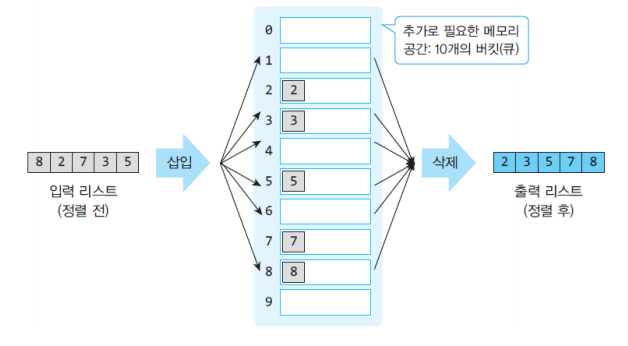

### 기수 정렬은 낮은 자리수 부터 비교하여 정렬

### 비교연산 X

### 정렬 속도가 빠르지만 데이터 전체 크기에 기수 테이블은 크기만한 메모리가 더 필요

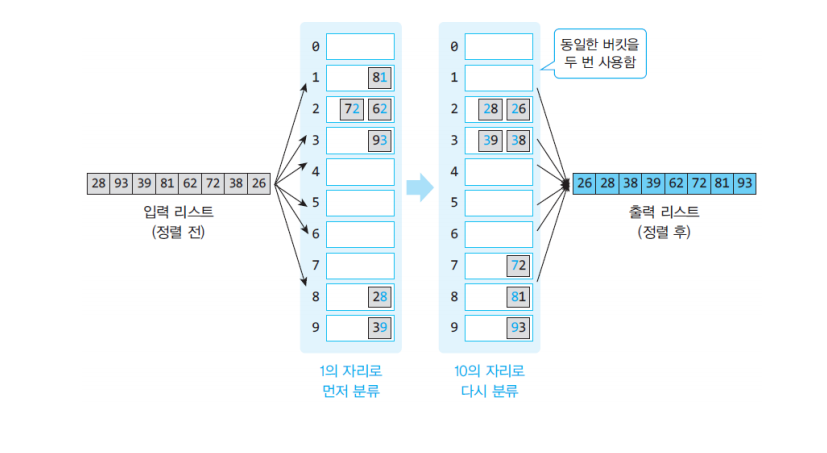

In [1]:
from queue import Queue         # 파이썬 queue모듈의 Queue 사용

def radix_sort(A) :
    queues = []     # 큐의 리스트

    for i in range(BUCKETS) :
        queues.append(Queue())   # BUCKETS개의 큐 사용
    n = len(A)
    factor = 1      # 1의 자리부터 시작
    for d in range(DIGITS) :     # 모든 자리에 대해
        for i in range(n) :    # 자릿수에 따라 큐에 삽입
            queues[(A[i]//factor) % 10].put(A[i])# 숫자를 삽입
        j = 0
        for b in range(BUCKETS) :   # 버킷에서 꺼내어 원래의 리스트로
            while not queues[b].empty() : # b번째 큐가 공백이 아닌 동안
                A[j] = queues[b].get()   # 원소를 꺼내 리스트에 저장
                j += 1
        factor *= 10     # 그 다음 자리수로 간다.
        print("step", d+1, A)   # 중간 과정 출력용 문장

import random    # 테스트를 위한 난수 발생을 위해 random 모듈 포함
BUCKETS = 10   # 10진법으로 정렬
DIGITS  = 4   # 최대 4 자릿수
data = []
for i in range(10) :
    data.append(random.randint(1,9999))   # 1~9999사이의 숫자 10개 생성
radix_sort(data)           # 기수 정렬
print("Radix:", data)           # 결과 출력

step 1 [3940, 8691, 5433, 4915, 5216, 1936, 3266, 9087, 1838, 2619]
step 2 [4915, 5216, 2619, 5433, 1936, 1838, 3940, 3266, 9087, 8691]
step 3 [9087, 5216, 3266, 5433, 2619, 8691, 1838, 4915, 1936, 3940]
step 4 [1838, 1936, 2619, 3266, 3940, 4915, 5216, 5433, 8691, 9087]
Radix: [1838, 1936, 2619, 3266, 3940, 4915, 5216, 5433, 8691, 9087]


## 시간복잡도 => O(dn)숫자에서 d개의 자릿수

## 공간복잡도 O(n) 

# 특징(단점)

# 킷값이 자연수로 표현되어야만 적용가능. why? 정수는양수와 음수로 분리 정렬

## 실수나 한글, 한자등으로 이루어진 킷값에 대해서는 거의불가(많은 버킷이 필요)

# 6.2 카운팅 정렬
## 리스트의 각 항목들을 단순히 세는 방법으로 정렬
## 리스트 한번 스캔, 각 항목이 리스트에 몇번 나타났는지 빈도수 계산, 가장 적은 항목부터 순서대로 빈도수 나열

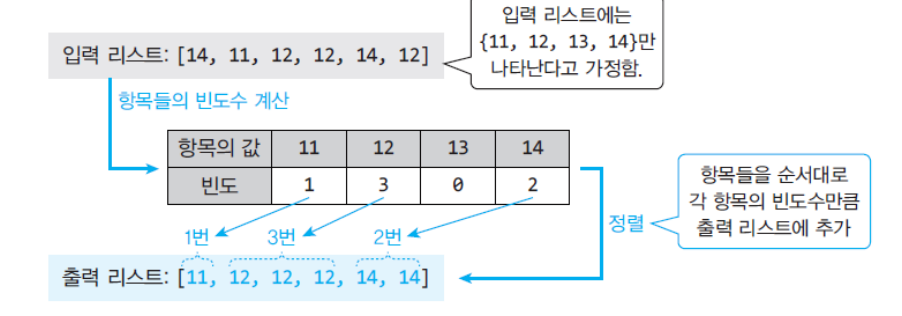


# 기수 정렬처럼 킷값 서로 비교 X 각 항목들의 빈도수 카운팅

## 빈도수 저장할 메모리 추가사용, 추가공간의 크기는 입력의 구성에 딸 ㅏ달라짐

### 0~99점수 => 크기 100인 점수 리스트
### 32비트 정수 => 214748 ~ 214748 엄청난 큰공간 비현실적
### 실수 => 거의 무한대 공간 적용 불가능
### 카운팅 정렬을 적용하기 가장 좋은 입력은 킷값이 일정한 개수로 제한되는 경우
### 카운팅 정렬 알고리즘(킷값 0~9 라고 가정 [1,4,1,2,7,5,2] 입력리스트)
### 1인 항목 2개=> 맨 앞 두 위치는 1,2는 1이 저장된 위치 다음부터 2개 자리 저장
### count를 저장해야할 위치로변경, 이를 위해 그림처럼 직전 인덱스의 빈도수 계속 더하기
## 리스트[1,4,1,2,7,5,2]의 정렬

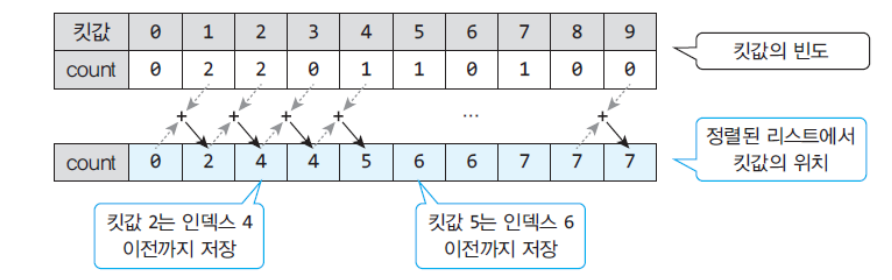





In [2]:
def counting_sort(A): 
    output = [0] * len(A)       # 정렬 결과저장용 임시 리스트
    count  = [0] * MAX_VAL      # 각 숫자의 빈도를 저장
    for i in A:                 # 각 숫자별 빈도를 계산
        count[i] += 1
  
    for i in range(MAX_VAL):    # count[i]가 출력 배열에서  
        count[i] += count[i-1]    # 해당 숫자의 위치가 되도록 수정
  
    for i in range(len(A)):      # 모든 입력항목 A[i]에 대해
        output[count[A[i]]-1] = A[i]    # 해당 위치(count[A[i]]-1)에 저장
        count[A[i]] -= 1           # 킷값 A[i]의 위치를 하나 줄임
    for i in range(len(A)):      # 정렬 결과를 원래 배열에 복사
        A[i] = output[i] 
MAX_VAL = 10
data = [ 1, 4, 1, 2, 7, 5, 2 ]
print("Original  : ", data)
counting_sort(data)             # 카운팅 정렬
print("Counting  : ", data)

Original  :  [1, 4, 1, 2, 7, 5, 2]
Counting  :  [1, 1, 2, 2, 4, 5, 7]


# 만약 입력의 크기가 n이고, 숫자의 범위가 k가지 (0~k-1)

# 시간복잡도 : O(k+n)

# 공간복잡도 : O(k+n)

# 공간 복잡도에서 k가 매우크다면 매우많은 공간 추가 예) 실수

# 6.3 문자열 매칭

## 길이가 n인 텍스트에서 길이가 m인 패턴을 찿기

## 억지 기법: 알고리즘 3.3 O(mn)

## 전처리 과정통해 패턴에 대한 정보를 얻고 이것을 테이블에 저장후 다음텍스트에서 패턴을 매칭

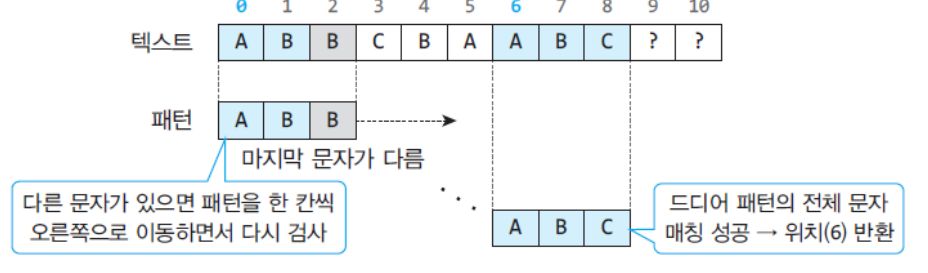

## 개선된 방법: 전처리를 이용한 정보 저장 및 활용

## KMP(Knuth Morris-pratt)

## 보이어 무어 (Boyer -Moore)

## 보이어 무어 알고리즘이 더 유리, 여기서는 보이어 무어 알고리즘의 단순한 형태인 호스풀 알고리즘부터 접근


# 호스풀 알고리즘 (경험적 전략을 이용)

## 하나의 위치(shift)에서 패턴은 뒤에서 부터 앞으로 검사, BANANA를 ANANAB의 순으로 MELPPA 와 비교

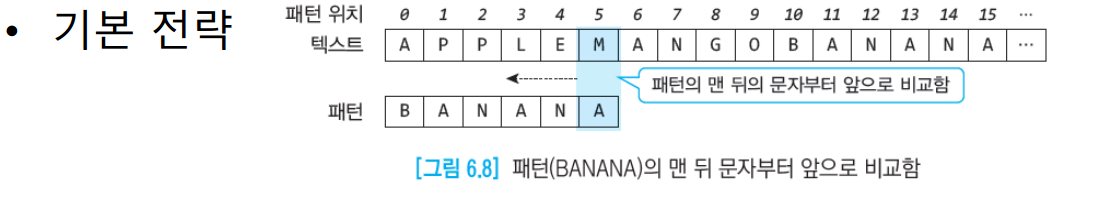


# 문자가 패턴에 없는 문자이면?

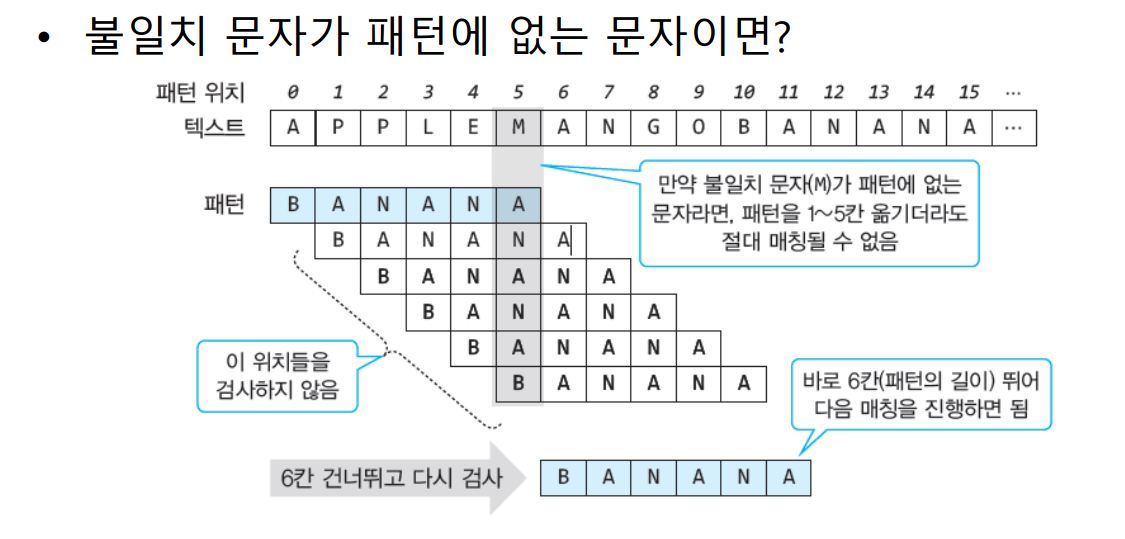

# 전처리 필요 : shitf_table(pat): 알고리즘 6.3
# 모든 가능한 알파벳에 대해 패턴에서의 위치를 저장한 표
## 전처리 통해 패턴의 정보를 구해 저장해놓고 검색에 사용 즉 추가적인 공간 이용하여 시간 줄이는 전략

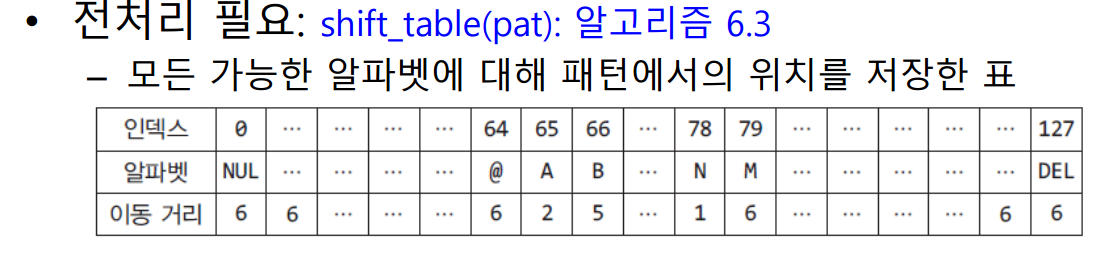


In [3]:
NO_OF_CHARS = 128

def shift_table(pat): 
    m = len(pat)                # 패턴의 길이
    tbl = [m]*NO_OF_CHARS       # 시프트 테이블
    for i in range(m-1):     # 패턴의 모든 문자에 대해
        tbl[ord(pat[i])] = m-1-i   # 그 알파벳이 패턴의 몇번째 문자인지
    return tbl

def search_horspool(T, P): 
    m = len(P)                      # 패턴의 길이
    n = len(T)                      # 텍스트(입력)의 길이
    t = shift_table(P)              # shift 테이블 생성
    i = m-1                         # 패턴의 우측끝 문자 위치
    while(i <= n-1):                # 가능한 모든 위치에 대해 
        k = 0                       # 매칭된 개수
        while k <= m-1 and P[m-1-k]==T[i-k]:    # 뒤에서 앞으로
            k += 1                  # 맞으면 계속 앞으로 진행
        if k == m :                 # 매칭성공: 매칭위치(왼쪽) 반환
            return i-m+1
        else :                      # 매칭실패
            i += t[ord(T[i])]       # T[i]의 테이블 참조 --> 건너뜀
    return -1                       # 매칭실패 –1 반환

print("패턴의 위치 :", search_horspool("APPLEMANGOBANANAGRAPE", "BANANA"))

패턴의 위치 : 10


# 최악의 경우 하나의 위치에서 패턴을 비교하는데 패턴길이 m만큼 비교

# O(MN)

# 평균 O(N) 억지기법보다 훨씬 효율적, 많이 복잡한 방법 사용하는 보이어 무어보다 별로 느리지않음

# 보이어 무어 알고리즘(호스풀 알고리즘에 추가적인 휴리스틱을 더해 효율증가)
# 나쁜 심벌 휴리스틱

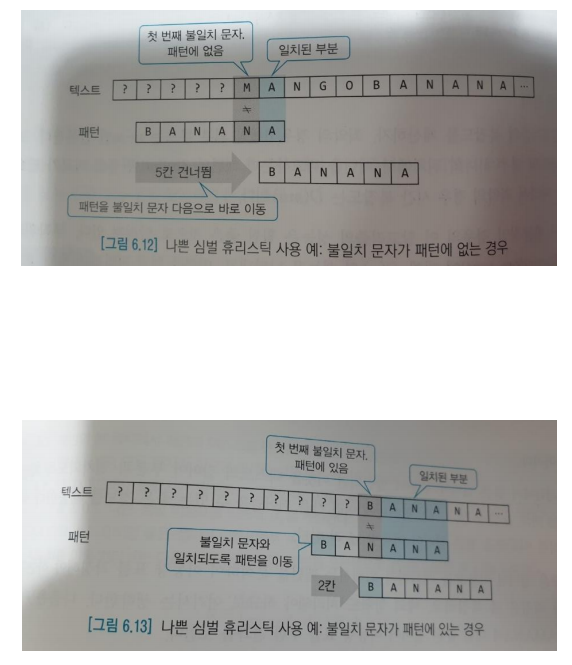

# 좋은 접미어 휴리스틱 (good suffix heuristic)

## 좋은 접미어: 일치된 부분의 전체 또는 일부가 패턴의 다른 부분에도 나타나는것

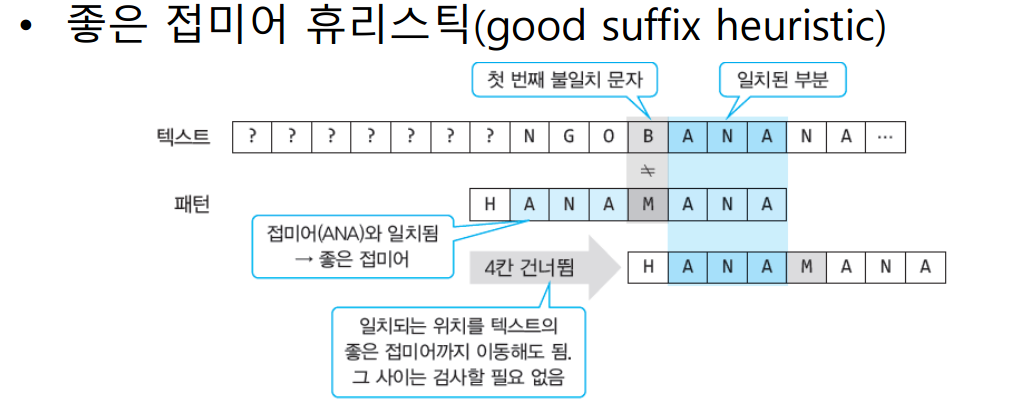

### banana

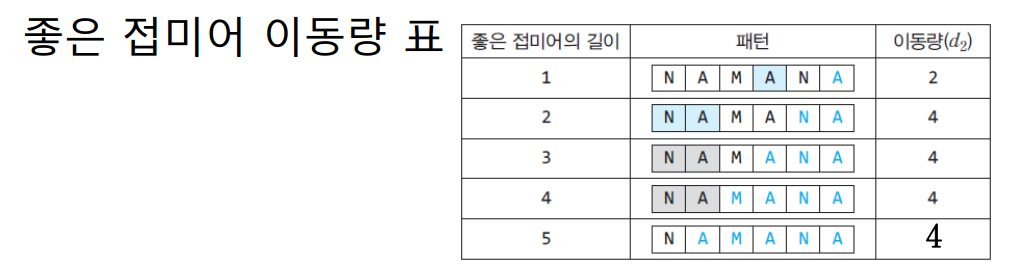


### 파란색 셀은 접미어가 일치하는 경우, 회색셀은 접미어의 일부가 접두어로 나타난 경우

### 나쁜 심벌 이동표는 아래 처럼 사용된 모든 문자에 대해 작성, 위 그림처럼 좋은 접미어 이동표는 패턴만 작성

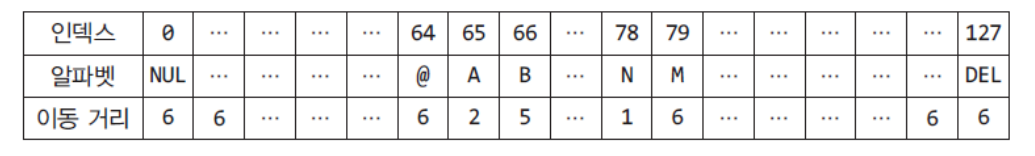